In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../figure_5.tsv", sep="\t", index_col=False )

In [3]:
blis_rows = df[df['lib'] == 'BLIS'][['M', 'K', 'N', 'min_elapsed']]

# Merge the BLIS min_elapsed back with the main dataframe based on M, K, N
df = df.merge(blis_rows, on=['M', 'K', 'N'], suffixes=('', '_blis'))

# Calculate the ratio of min_elapsed to the corresponding BLIS min_elapsed
df['ratio_to_blis'] = df['min_elapsed_blis'] / df['min_elapsed']




In [4]:
dnnl_rows = df[df['lib'] == 'OneDNN'][['M', 'K', 'N', 'min_elapsed']]

# Merge the BLIS min_elapsed back with the main dataframe based on M, K, N
df = df.merge(dnnl_rows, on=['M', 'K', 'N'], suffixes=('', '_onednn'))

# Calculate the ratio of min_elapsed to the corresponding BLIS min_elapsed


In [5]:
df['ratio_to_onednn'] = df['min_elapsed_onednn'] / df['min_elapsed']

In [6]:
order = ['Matmul_1_1 Kernel 8x8', 'Matmul_1_2 Kernel 8x8', 'Matmul_2_2 Kernel 8x8', 'FBGEMM-8bits']

In [7]:
df = df.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])


{'3556': 'M: 64\nK: 576\nN: 2916', '3620': 'M: 128\nK: 576\nN: 2916', '1956': 'M: 128\nK: 1152\nN: 676', '2084': 'M: 256\nK: 1152\nN: 676', '2704': 'M: 256\nK: 2304\nN: 144', '2960': 'M: 512\nK: 2304\nN: 144', '5145': 'M: 512\nK: 4608\nN: 25'}


/tmp/ipykernel_689161/2216718457.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(new_ticks, fontdict={"size":MEDIUM_SIZE})


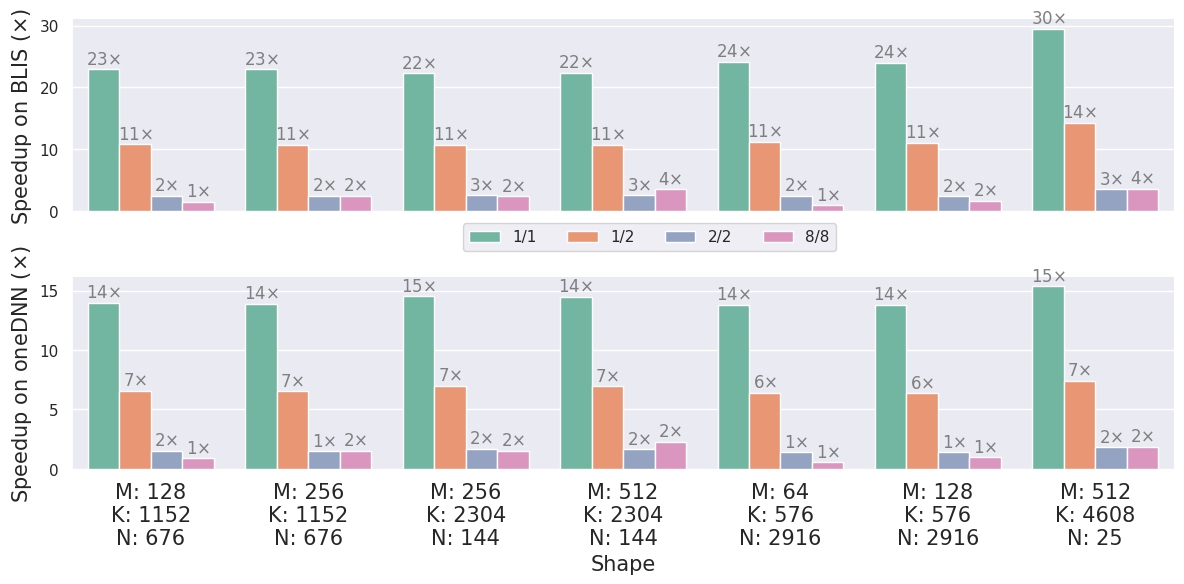

In [20]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 25
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # 



sns.set_style('darkgrid')
sns.set_context("notebook")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)







sns.set_palette(sns.color_palette("Set2"))



sns.barplot(x = "shape", y = "ratio_to_blis", hue ="lib", data=df, hue_order=order, ax=ax1)
sns.barplot(x = "shape", y = "ratio_to_onednn", hue ="lib", data=df, hue_order=order, ax=ax2)

for c in ax1.containers:
    # set the bar label
    ax1.bar_label(c, fmt=r"{}$\times$".format("%.0f"), label_type='edge', padding=1, fontsize=SMALL_SIZE, color="tab:gray")


for c in ax2.containers:
    # set the bar label
    #ax2.bar_label(c, fmt='%.0f', label_type='edge', padding=1, fontsize=11)
    ax2.bar_label(c, fmt=r"{}$\times$".format("%.0f"), label_type='edge', padding=1, fontsize=SMALL_SIZE, color="tab:gray")
    


current_handles, current_labels = plt.gca().get_legend_handles_labels()
new_labels = ["1/1", "1/2", "2/2", "8/8"]
ax1.legend(current_handles, new_labels, ncol=4, bbox_to_anchor=(0.70, -0.025 ))
ax1.set_xlabel("")
ax1.set_ylabel(r"Speedup on BLIS ($\times$)", fontsize=MEDIUM_SIZE)
ax2.set_ylabel(r"Speedup on oneDNN ($\times$)", fontsize=MEDIUM_SIZE)


ax2.get_legend().remove()
# ax1.set_xlabel("Shape")
# ax1.set_ylabel("Speedup BLIS")
ticks = ax2.get_xticklabels()
labels = dict()
for x in df[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]

rev_labels = {str(v):k for k,v in labels.items()}
print(rev_labels)
new_ticks = [rev_labels[t._text] for t in ticks]
# #ax1 = plt.xticks(range(len(ticks[1])), new_ticks) 
ax2.set_xticklabels(new_ticks, fontdict={"size":MEDIUM_SIZE})
ax2.set_xlabel("Shape", fontsize=MEDIUM_SIZE)
# plt.ylim([0, 29.5])
# plt.tight_layout()
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=1)
plt.savefig("Bitwise_comparison_blis_annoteded.pdf", dpi=300, bbox_inches="tight")

In [ ]:
ax1.containers[0]

In [ ]:
!realpath .